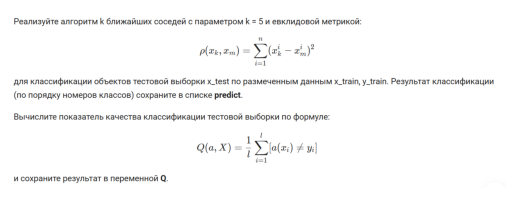

In [2]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/5_1_2.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


np.random.seed(0)
n_feature = 5 # количество признаков

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7, -2, 4, 6]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 100, 120, 90
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

# здесь продолжайте программу
kn = 5
predict = np.zeros_like(y_test) # возвращает нулевую матрицу такой же конфигурации как y_test
for i, x in enumerate(x_test):
    dist = np.sum(np.square((x_train - x)), axis=1) # находим расстояние между x и x_train (всеми признаками) путем суммирования строк (axis=1)
    ss = np.argsort(dist) # возвращает массив индексов, которые бы отсортировали массив dist
    T = y_train[ss] # возвращает образы по индексу (массив так называемых образов для минимальных расстояний (ss))
    #print(dist, T, ss)
    #print("-----")
    z = [str(x) for x in T[:kn]] # преобразует значения в массиве в массив строк значений
    #print("".join(z))
    max_amount = lambda x: np.argsort([(int(x.count('0.')), int(x.count('1.')), int(x.count('2.')))])[-1][-1] # ищем моду в строке (говоря языком статистики), а ваще я НЕАДВЭКВАТ
    predict[i] = max_amount("".join(z))
    #print(max_amount("".join(z)))
    #print(predict, T[:kn])

Q = np.mean((predict != y_test))
Q

0.16129032258064516